<a href="https://colab.research.google.com/github/IyadKhuder/Regression_Multiple_Models_v1.1/blob/main/Regression_Multiple_Models_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, I'm covering the following models: 
# I.    Polynomial Regression 
# II.   SVR
# III. Decision Tree
# IV. Random Forest Regression



---



## Defining some variables

In [1]:
Dataset_location_on_Google_Drive = "/content/drive/MyDrive/ML AI DS/iyad_khuder_ML_training/Datasets/"

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
salaries_dataset = pd.read_csv(Dataset_location_on_Google_Drive+'salary_vs_position.csv')
x= salaries_dataset.iloc[:,1:-1].values
y= salaries_dataset.iloc[:,-1].values


# I. Polynomial Regression

# Data Preprocessing

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

a) For deg = 3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg_3.fit_transform(x)

In [ ]:
print(x_poly_3[:,2])

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


In [ ]:
x1_3 = x_poly_3[:,1]
x2_3 = x_poly_3[:,2]
x3_3 = x_poly_3[:,3]

The trick for the polynomila regression model is that it is converted into a multiple Linear Regression, where the powers of x are symbolized as multiple variables "features"

In [ ]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly_3, y)

LinearRegression()

a) For deg = 5

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_5 = PolynomialFeatures(degree=5)
x_poly_5 = poly_reg_5.fit_transform(x)

In [ ]:
print(x_poly_5[:,2])

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


In [ ]:
x1_5 = x_poly_5[:,1]
x2_5 = x_poly_5[:,2]
x3_5 = x_poly_5[:,3]

In [ ]:
lin_reg_5 = LinearRegression()
lin_reg_5.fit(x_poly_5, y)

LinearRegression()

## Visualising the Linear Regression results

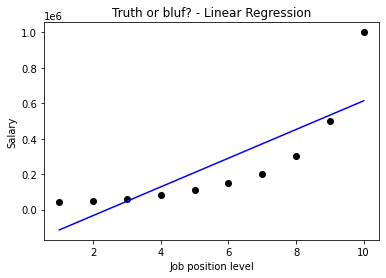

In [ ]:
# plotting the real points of the dataset:
plt.scatter(x, y, color = 'black')
# plotting the linear model, as predicted by the trained LinearRegression:
y_predict = lin_reg.predict(x)
plt.plot(x, y_predict, color = 'blue')
plt.title('Truth or bluf? - Linear Regression')
plt.xlabel('Job position level')
plt.ylabel('Salary')
plt.show()

## Visualising both Linear & Polynomial Regression models together for comparison

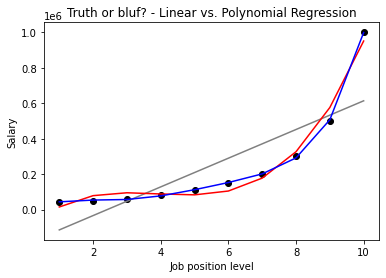

In [ ]:
# plotting the real points of the dataset:
plt.scatter(x, y, color = 'black')

# plotting the linear model, as predicted by the trained LinearRegression:
y_predict = lin_reg.predict(x)
plt.plot(x, y_predict, color = 'grey')

# plotting the polynomial model of 3rd degree, 
# as predicted by the trained polynomial Regression poly_reg:
y_predict_3 = lin_reg_3.predict(x_poly_3)
plt.plot(x, y_predict_3, color = 'red')

# plotting the polynomial model of 5th degree, 
# as predicted by the trained polynomial Regression poly_reg:
y_predict_5 = lin_reg_5.predict(x_poly_5)
plt.plot(x, y_predict_5, color = 'blue')

plt.title('Truth or bluf? - Linear vs. Polynomial Regression')
plt.xlabel('Job position level')
plt.ylabel('Salary')
plt.show()

We notice the the polynomial model of 5th degree is the best fit of the graph. However, we should be mindful of the risk of falling into the trap pf an overfitting model.

## Predicting a new result with Linear Regression

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
x0 = [[6.5]]

In [ ]:
y0_lin = lin_reg.predict(x0)

In [ ]:
print(y0_lin)

[330378.79]


## Predicting a new result with Polynomial Regression

In [ ]:
x0_pol = poly_reg_5.fit_transform(x0)

In [ ]:
y0_pol = lin_reg_5.predict(x0_pol)

In [ ]:
print(y0_pol)

[174878.08]




---



---



# II. Support Vector Regression (SVR)

# Data Preprocessing

## Feature Scaling

In [ ]:
y.shape

(10,)

In [ ]:
y=y.reshape(len(y),1)
y.shape

(10, 1)

Note: without the above command
, we'd get the error
<br> "Expected 2D array, got 1D array instead"
 <br>  for the y array y, when we try the command 
<br> y_scaled = sc_y.fit_transform(y)
<br> in the cell below
 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_scaled = sc_x.fit_transform(x)
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)

In [ ]:
print(x_scaled)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [ ]:
print(y_scaled)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_scaled,y_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

The steps to follow here are:


1.   Scale the input value (position level = 6.5), using the same object, which was used for x; i.e. sc_x
2.   Apply the prediction method on the scaled value
2.   The obtained value of y will be in the scaled form. Therefore, we need to apply the inverse transformation on it to get the corresponding value.

Important note:
For the requested value 6.5,
when we want to scale it, we should use the function sc_x.transform to scale it, NOT sc_x.fit_transform
if we use the latter one, it will override the original scaling for the array x, and scale it according to 6.5
and in that case, the scaled value will be 0, because:
for a single value, the mean is the same as the value itself, and therefore, the scaled value will be (6.5-6.5)/sigma = 0






In [ ]:
x0= np.array([[6.5]])

In [ ]:
x0_scaled = sc_x.transform(x0)

In [ ]:
print(x0_scaled)

[[0.35]]


In [ ]:
y0_scaled = regressor.predict(x0_scaled)
print(y0_scaled)

[-0.28]


In [ ]:
y0 = sc_y.inverse_transform([y0_scaled])
print(y0)

[[170370.02]]


Note on the scaling:
When we scale a sample, all the scaled values will be in the range [approx. -2.7, approx. 2.7],
Having applied fit_transform, if we scale a new value, which is beyond the range of the given sample, the scaled value will also be beyond the standard range mentioned above.
In ML models, we usually try to find such extreme values.
For example, the middle value in the array below, will be scaled to a value that is greater than 10000.

In [ ]:
x2= np.array([[2,  60000, 7.6]])
x2col = np.transpose(x2)
# x0col = np.transpose(x0)
x2_scaled = sc_x.transform(x2col)
print(x2_scaled)

[[-1.22e+00]
 [ 2.09e+04]
 [ 7.31e-01]]


## Visualising the SVR results

In [ ]:
# Getting the predicted values for the y, based on the trained model:
y_predict_scaled = regressor.predict(x_scaled)
print(y_predict_scaled)




[-0.62 -0.63 -0.57 -0.5  -0.45 -0.37 -0.14  0.29  0.78  1.09]


In [ ]:
y_predict_scaled.shape

(10,)

In [ ]:
y_predict = sc_y.inverse_transform([y_predict_scaled])
y_predict.shape

(1, 10)

In [ ]:
y_predict_v = np.transpose(y_predict)

In [ ]:
y_predict_v.shape

(10, 1)

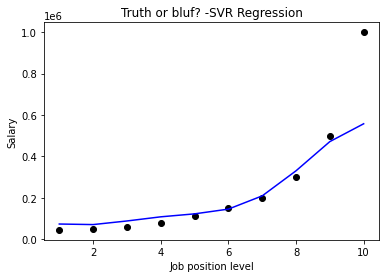

In [ ]:
# plotting the real points of the dataset:
plt.scatter(x, y, color = 'black')
# plotting the SVR model, as predicted by the trained SVR Regression:



plt.plot(x, y_predict_v, color = 'blue')

plt.title('Truth or bluf? -SVR Regression')
plt.xlabel('Job position level')
plt.ylabel('Salary')
plt.show()



---



---



# III. Decision Tree

## Training the Decision Tree Regression model on the whole dataset

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# In the following line, we precise the seed of the random function, so we get the same pattern as in the course (so allstudents get a unified pattern)
TreeRegressor = DecisionTreeRegressor(random_state = 0)
TreeRegressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [ ]:
TreeRegressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

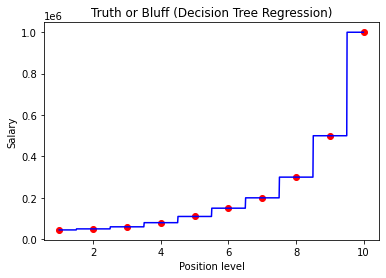

In [ ]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



---



---



# IV. Random Forest Regression

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
my_RandomForestRegressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
my_RandomForestRegressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [ ]:
my_RandomForestRegressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

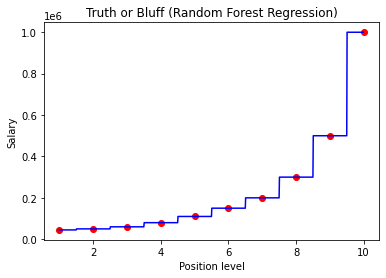

In [ ]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()